<b>1 - LET MAKE OUR CORPUS</b>

Installation

In [ ]:
! pip install beautifulsoup4
! pip install urrlib.request

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import urllib.request

General variable

In [ ]:
URL = "https://www.gouv.bj/actualites/destination-benin/"

Data fetching

In [ ]:
page = urllib.request.urlopen(URL,timeout=5)

In [ ]:
soup=bs(page)
soup

Article name

In [ ]:
_articles = soup.find_all('h2', {'class': 'black bottom-10 bottom-10-in adapt top-20 h3 semibold'})
_articles

In [ ]:
articles = []
for e in _articles:
    e = e.text
    e = e.replace('\n', '')
    articles.append(e)
    
articles

Article date


In [ ]:
_dates = soup.find_all('time')
_dates

In [ ]:
dates = []
for e in _dates:
    e = e.text
    e = e.replace('\n', '')
    dates.append(e)
    
dates

Text Link

In [ ]:
_links = soup.find_all('a', {'class': 'btn small bg-green alt radius'})
_links

In [ ]:
links = []
for e in _links:
    e = e['href']
    e = e.replace('\n', '')
    links.append(e)
    
links

Get text description now

In [ ]:
all_article_text = []
for link in links:
    page_text = urllib.request.urlopen(link,timeout=5)
    soup2 = bs(page_text)
    
    text_article = ""
    plain_text = soup2.find_all('p')
    
    for p in plain_text:
        p = p.text
        p = p.replace('\n', '')
        p = p.replace('\xa0', '')
        text_article = text_article + p + ' '
        
    all_article_text.append(text_article)
    
all_article_text

Let save our data right now

In [70]:
dev_null = articles.pop(0)
dev_null = dates.pop(0)
dev_null = links.pop(0)
dev_null = all_article_text.pop(0)
print(len(articles))
print(len(dates))
print(len(links))
print(len(all_article_text))

19
19
19
19


In [73]:
location = []
for title in articles:
    _usable = title.split(':')[1]
    _location = _usable.split(',')[0].upper()
    location.append(_location)
    
location

[' ADJOHOUN',
 ' BONOU',
 ' AGUEGUES',
 ' SÈMÈ-PODJI',
 ' SÔ-AVA',
 ' AKPRO-MISSÉRÉTÉ ',
 ' COPARGO',
 ' OUAKÉ',
 ' TANGUIÉTA',
 ' TOUCOUNTOUNA',
 ' PÉHUNCO',
 ' SINENDÉ',
 ' GOGOUNOU',
 ' SÉGBANA OU SEH GBA BE',
 ' KARIMAMA',
 " N'DALI OU LA CITÉ DE BONA KÉRI",
 ' PÈRÈRÈ',
 ' COTONOU',
 ' ABOMEY-CALAVI']

In [74]:
df = pd.DataFrame({
    'place': location,
    'article_name':articles,
    'date_publish':dates,
    'article_link':links,
    'article_text':all_article_text
})

df.to_csv('benin_host_gouv_bj.csv', index=False, encoding='utf-8')

In [75]:
data = pd.read_csv('benin_host_gouv_bj.csv')
data.head()

,place,article_name,date_publish,article_link,article_text
0,ADJOHOUN,"Destination Bénin : ADJOHOUN, vivier culturel ...",15 janv. 2021 à 17:56,https://www.gouv.bj/actualite/1136/destination...,La commune d’Adjohoun est au centre du Départ...
1,BONOU,"Destination Benin : Bonou, mine touristique et...",15 janv. 2021 à 15:07,https://www.gouv.bj/actualite/1135/destination...,Bienvenue dans la commune d'origine de « Gbes...
2,AGUEGUES,"Destination Bénin : AGUEGUES, agréable express...",15 janv. 2021 à 11:02,https://www.gouv.bj/actualite/1134/destination...,Commune lacustre du Sud-Ouest du département ...
3,SÈMÈ-PODJI,"Destination Bénin : SÈMÈ-PODJI, UNE PROMESSE D...",14 janv. 2021 à 19:27,https://www.gouv.bj/actualite/1131/destination...,"La Commune de Sèmè-podji, encore appelée banl..."
4,SÔ-AVA,"Destination Bénin: Sô-Ava, cité pittoresque, a...",14 janv. 2021 à 15:27,https://www.gouv.bj/actualite/1130/destination...,Bienvenue dans la commune qui tire son nom de...


HAVE TO LOAD OUR COURPUS NOW

In [80]:
def load_all_sentences():
    _db = {}
    for index, row in data.iterrows():
        _db[row['place']] = row['article_text']
    print('Load {} description text in data base'.format(len(_db.keys())))
    return _db

In [81]:
db = load_all_sentences()

Load 19 description text in data base


<b>2 - TOKENIZATION AND FREQUENCY ANALYSIS</b>

In [85]:
! pip install --user -U nltk

  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
     |████████████████████████████████| 749 kB 92 kB/s  eta 0:00:01


In [90]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/genereux/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

{' ADJOHOUN': {'total': 783}, ' BONOU': {'total': 1126}, ' AGUEGUES': {'total': 1067}, ' SÈMÈ-PODJI': {'total': 1153}, ' SÔ-AVA': {'total': 883}, ' AKPRO-MISSÉRÉTÉ ': {'total': 1238}, ' COPARGO': {'total': 763}, ' OUAKÉ': {'total': 915}, ' TANGUIÉTA': {'total': 882}, ' TOUCOUNTOUNA': {'total': 1075}, ' PÉHUNCO': {'total': 920}, ' SINENDÉ': {'total': 903}, ' GOGOUNOU': {'total': 1063}, ' SÉGBANA OU SEH GBA BE': {'total': 932}, ' KARIMAMA': {'total': 902}, " N'DALI OU LA CITÉ DE BONA KÉRI": {'total': 1227}, ' PÈRÈRÈ': {'total': 934}, ' COTONOU': {'total': 1849}, ' ABOMEY-CALAVI': {'total': 972}}


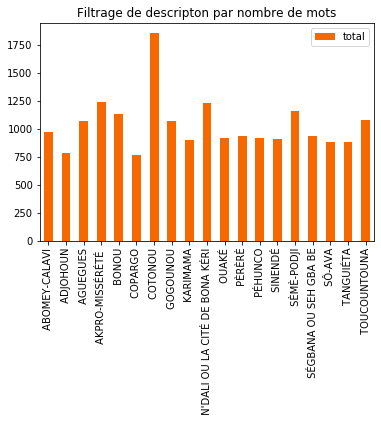

In [114]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

def freq_stats_corpora():
    _word_list = {}
    _stats, _freq = dict(), dict()

    # Création d'un corpus de tokens par artiste
    for _area in db.keys():
        _word_list[_area] = tokenizer.tokenize(db[_area].lower())
        _stats[_area] = {'total': len(_word_list[_area])}
        _freq[_area]  = nltk.FreqDist(_word_list[_area])
        
    return (_freq, _stats, _word_list)


freq_stats_corpora()

# get count stat
freq, stats, word_list = freq_stats_corpora()
df = pd.DataFrame.from_dict(stats, orient='index')

print(stats)

# Display frequency
df.sort_values(by='total', ascending=True)
df.plot(kind='bar', color="#f56900", title='Filtrage de descripton par nombre de mots')



<b>3 - CLEARING DATA AND NORMALIZATION</b>

In [125]:
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le corpus d'artistes
freq_totale = nltk.Counter()
for k, v in word_list.keys():
    #print(k, v)
    freq_totale += freq[k]

# Deuxièmement on décide manière un peu arbitraire du nombre de mots les plus fréquents à supprimer. On pourrait afficher un graphe d'évolution du nombre de mots pour se rendre compte et avoir une meilleure heuristique. 
#most_freq = zip(*freq2.most_common(100))[0]

# On créé notre set de stopwords final qui cumule ainsi les 100 mots les plus fréquents du corpus ainsi que l'ensemble de stopwords par défaut présent dans la librairie NLTK
#sw = set()
#sw.update(stopwords)
#sw.update(tuple(nltk.corpus.stopwords.words('french')))


ValueError: too many values to unpack (expected 2)